In [320]:
import pyshtools as sh  #py spherical harmonics tools package
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors, cm

## Generating isotropic gaussian random fields on the sphere


We use the lemma in https://arxiv.org/pdf/1305.1170.pdf (section 5) to generate isotropic GRF on $\mathbb{S}^2$.

## defining the lat/lon grid :

In [446]:
n = 400
m,n = 2*n, n # number longitudes, number of latitudes 
phi,theta = np.linspace(-np.pi,np.pi,m), np.linspace(-np.pi/2,np.pi/2,n)
THETA, PHI = np.meshgrid(range(n),range(m))
deg_to_radian = 2*np.pi/360

xtheta, xphi = np.meshgrid(theta, phi)

R = 1

ex,ey,ez = np.eye(3)


X = R * np.cos(xtheta)*np.cos(xphi)
Y = R * np.cos(xtheta)*np.sin(xphi)
Z = R * np.sin(xtheta)

OM = X[:,:,np.newaxis]*ex + Y[:,:,np.newaxis]*ey + Z[:,:,np.newaxis]*ez

def projection(vecteur):
    return (np.dot(vecteur,ex),np.dot(vecteur,ey),np.dot(vecteur,ez))

## planisphere plot :

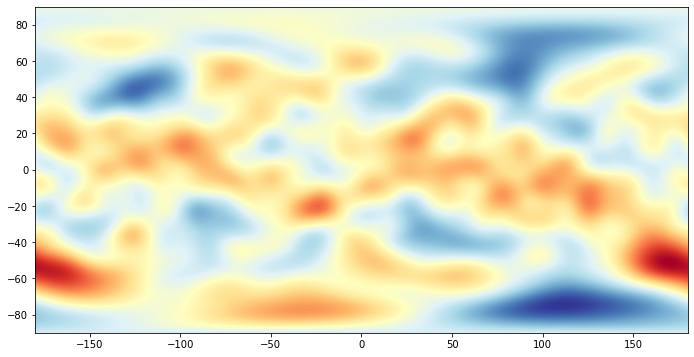

In [458]:
Lmax = 25

ls = [ [index] * (index+1) for index in range(0,Lmax+1)]
ms=  [  list(range(0,l+1)) for l in range(0,Lmax+1)  ]

ls = np.sum(ls)
ms = np.sum(ms)

Llm = np.array([sh.legendre.legendre_lm(ls,ms, np.sin(_theta)) for _theta in theta]).T

# influence the length-scales by putting more or less weigth on the spherical harmonics of higher order.
Al = .65**np.arange(0,Lmax+1,1)

Ll0_index = [n*(n+1)//2 for n in range(Lmax+1)]

T = np.zeros_like(THETA)*1.0
for l, Al_coef in enumerate(Al):
    T += Al_coef**.5 * Llm[Ll0_index[l]] * np.random.normal(0,1)
    
    for m in range(1,l):
        mm  = Ll0_index[l] + m
        T += (2*Al_coef)**.5 * Llm[mm] * (np.random.normal(0,1) * np.cos(m*phi)[:,np.newaxis] + 
                                          np.random.normal(0,1) * np.sin(m*phi)[:,np.newaxis])

plt.figure(figsize=(12,6))
plt.imshow(T.T,extent=[-180,180,-90,90],cmap='RdYlBu');

## sphere plot :

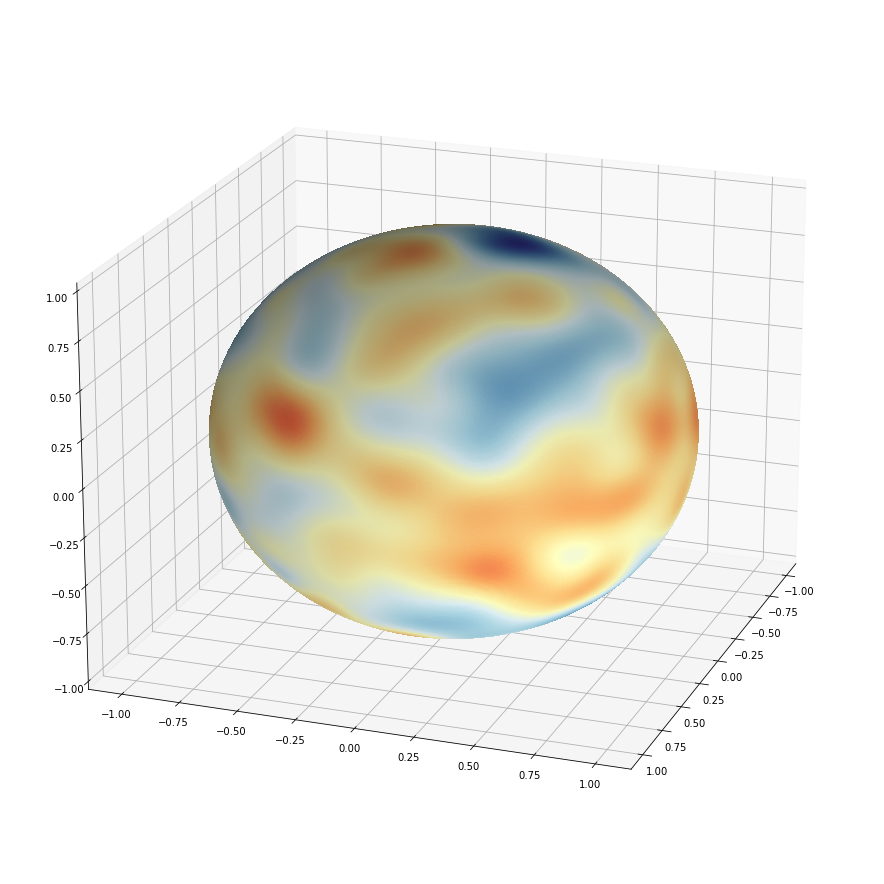

In [459]:
from matplotlib import colors, cm
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(1,1,1,projection='3d')

ax.view_init(elev=20., azim=20)

strength = T
norm=colors.Normalize(vmin = np.min(strength),
                      vmax = np.max(strength), clip = False)

surface = ax.plot_surface(*projection(OM), rstride=1, cstride=1,
                       linewidth=0, antialiased=False,
                       facecolors=cm.RdYlBu(norm(strength)),zorder=1)